In [850]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from pandas.plotting import lag_plot
from pandas import datetime
from sklearn.metrics import mean_squared_error
from pmdarima.arima.utils import ndiffs
import pmdarima as pm

<ipython-input-850-4ff4afe7ba93>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [851]:
df=pd.read_csv('/home/kumar/Downloads/predice-el-futuro/train_csv.csv',header = 0, index_col = 1, parse_dates = True, squeeze = True)
df.head()

,id,feature
time,,
2019-03-19 00:00:00,0,237.97
2019-03-19 00:00:10,1,57.93
2019-03-19 00:00:20,2,90.53
2019-03-19 00:00:30,3,260.75
2019-03-19 00:00:40,4,49.70


In [852]:
df=df.drop('id',axis=1)

In [853]:
df.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


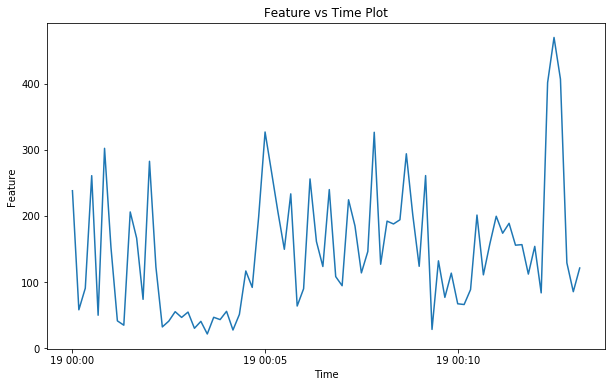

In [854]:
plt.title('Feature vs Time Plot')
plt.xlabel('Time')
plt.ylabel('Feature')
plt.plot(df)
plt.show()

In [855]:
#Splitting data to Test:Train
train = df[0:56] 
test = df[56:]

In [856]:
train.size,test.size

(56, 24)

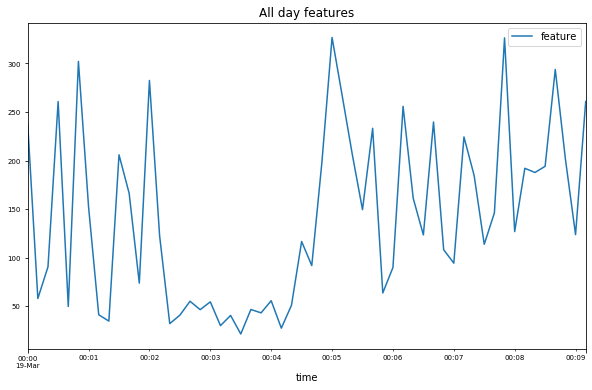

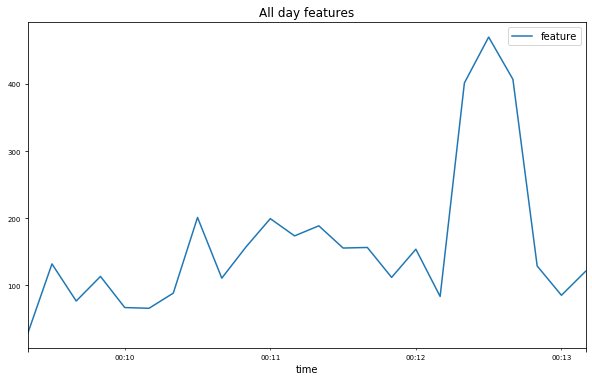

In [857]:
train.plot( title= 'All day features', fontsize=7)
test.plot( title= 'All day features', fontsize=7) 
plt.show()

In [858]:
# extract out the time-series
train_feature =  train['feature']
test_feature =  test['feature']

In [859]:
from statsmodels.tsa.stattools import adfuller

df_test = adfuller(train_feature)
df_test
print('DF test statistic is %3.3f' %df_test[0])
print('DF test p-value is %1.4f' %df_test[1])

DF test statistic is -2.019
DF test p-value is 0.2782


Since p-value > 0.05. Can't reject Null Hypothesis.

In [860]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [861]:
# plot_acf is to identify parameter q
# ARIMA (p,d,q)

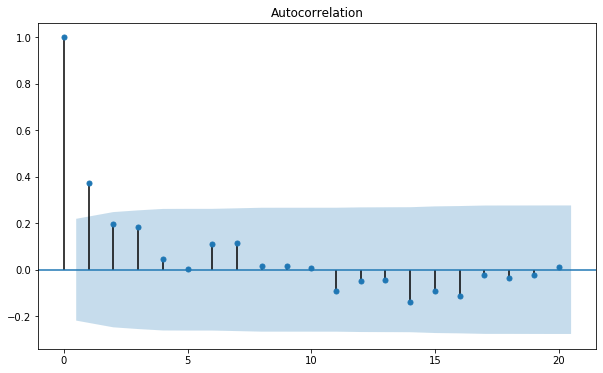

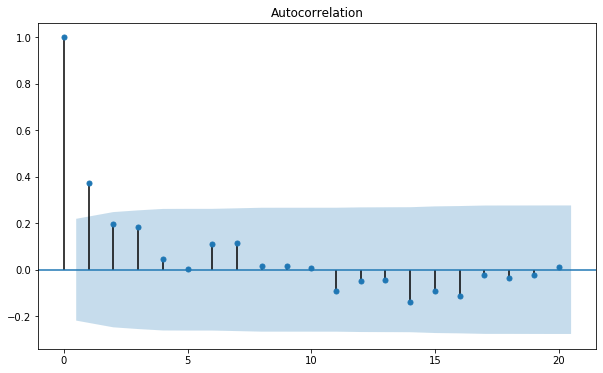

In [862]:
plot_acf(df) #identify the value of q

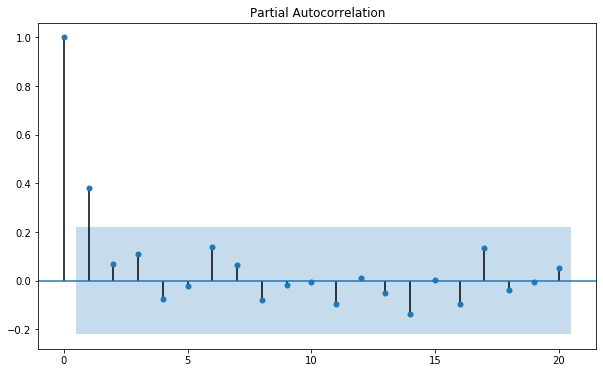

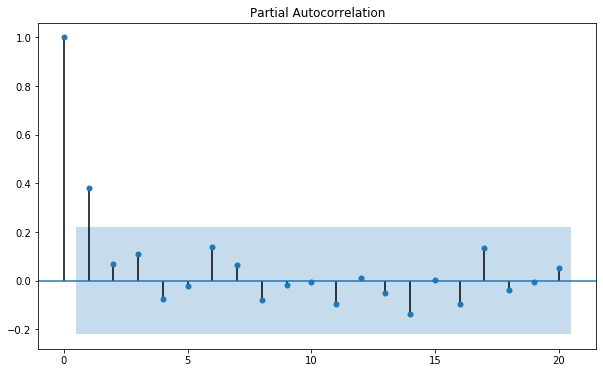

In [863]:
plot_pacf(df)  #identify the value of p

In [864]:
model=ARIMA(train,order=(1,1,1))

/home/kumar/miniconda3/envs/DS_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  warnings.warn('No frequency information was'
/home/kumar/miniconda3/envs/DS_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  warnings.warn('No frequency information was'


In [865]:
model_fit=model.fit()

In [866]:
model_fit.aic

652.8699198951979

In [867]:
model_forecast=model_fit.forecast(steps=24)[0]

In [868]:
pd.DataFrame(model_forecast).size

24

In [869]:
model_forecast.size,test.size

(24, 24)

In [870]:
model_forecast=pd.DataFrame(model_forecast)
model_forecast.head()
model_forecast.column=['Forecast']

<ipython-input-870-eed609e1b973>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  model_forecast.column=['Forecast']


In [871]:
test.head()

,feature
time,
2019-03-19 00:09:20,28.26
2019-03-19 00:09:30,131.97
2019-03-19 00:09:40,76.73
2019-03-19 00:09:50,113.35
2019-03-19 00:10:00,67.01


In [872]:
model_forecast.head()

,0
0,210.144601
1,211.912181
2,213.022394
3,214.140839
4,215.259181


/home/kumar/miniconda3/envs/DS_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  warnings.warn('No frequency information was'
/home/kumar/miniconda3/envs/DS_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  warnings.warn('No frequency information was'


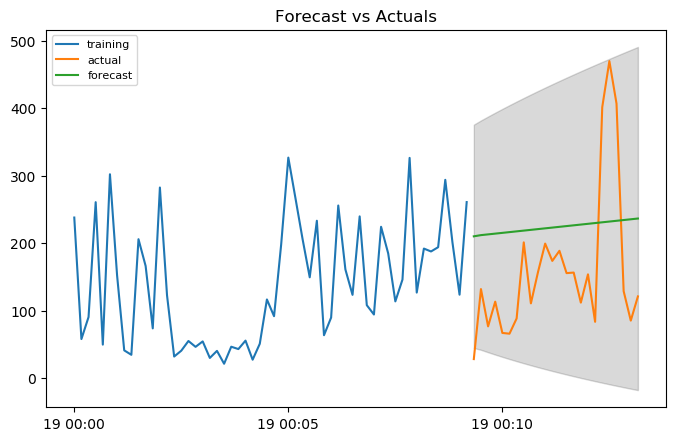

In [873]:
# Build Model 
model = ARIMA(train_feature, order=(1,1,1)) #Chosen this combination of p,q,d after trying other combinations 
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(24, alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train_feature, label='training')
plt.plot(test_feature, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [874]:
forecast = fitted.forecast(steps=40)[0]

In [875]:
pred = pd.read_csv('/home/kumar/Downloads/predice-el-futuro/test_csv.csv')

In [876]:
pred['feature'] = forecast
pred=pred.drop('time',axis=1)
pred.head()

,id,feature
0,80,210.144601
1,81,211.912181
2,82,213.022394
3,83,214.140839
4,84,215.259181


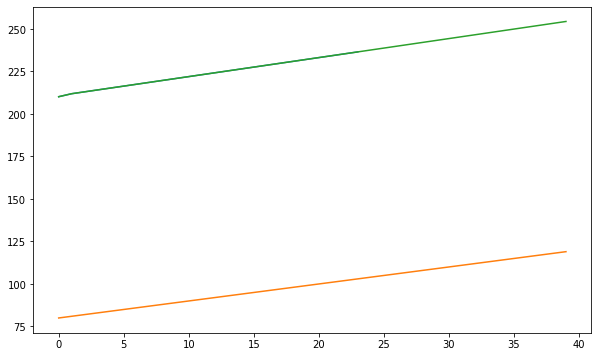

In [877]:
plt.plot(model_forecast)
plt.plot(pred)
plt.show()

In [878]:
pred.to_csv('/home/kumar/Downloads/predice-el-futuro/solution.csv')

In [879]:
from sklearn.metrics import r2_score

In [880]:
score=r2_score(test,model_forecast)
score

-0.25972938546553315

In [881]:
# 2,1,2 -0.27
# 1,1,1 -0.25

In [882]:
model = pm.auto_arima(train, start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=2, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=651.580, BIC=663.624, Time=0.364 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=673.167, BIC=677.182, Time=0.011 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=663.988, BIC=670.010, Time=0.086 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=650.836, BIC=656.858, Time=0.073 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=671.168, BIC=673.175, Time=0.010 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=652.831, BIC=660.861, Time=0.098 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=652.828, BIC=660.858, Time=0.096 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=650.627, BIC=660.664, Time=0.244 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Total fit time: 1.004 seconds
